In [1]:
# TRABALHO INDIVIDUAL - SEGUNDA ENTREGA in PYHTON 

# 1. Análise dos Dados 

# 2. Correlação dos Dados

# 3. Previsão de vendas 


In [2]:
# 1. ANÁLISE DOS DADOS 

In [3]:
#  Importação das bibliotecas necessárias e instalação de tecnologias 

In [4]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost

In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

%matplotlib inline

In [8]:
# Dados são referentes a metade de 2019 até meados de janeiro de 2023

In [9]:
current_directory = os.getcwd()
file_path = current_directory + '/csv/anonymous_orders.csv'

In [10]:
df_orders = pd.read_csv(file_path)

In [11]:
# Análise exploratória df_orders 
## Tranformação de algumas variavéis em float para ter uma melhor análise das informações 

In [12]:
df_orders.shape

(2295, 25)

In [13]:
df_orders = df_orders.drop(columns=['Unnamed: 0'])

In [14]:
df_orders['total'] = df_orders['total'] / 100
df_orders['subtotal'] = df_orders['subtotal'] / 100

In [15]:
df_orders.head()

,_id,shippingStatus,subtotal,total,products,shippingTotal,user,gatewayStatus,createdAt,updatedAt,...,coupon.code,coupon.seller,coupon.discount,coupon.couponType,weather.main.temp,createdAt Timezone,Sale Hour,weekday-number,weekday,day_month
0,5f7e26f9ca1cb600176e5f01,done,242.0,242.0,[{'selectedVariation': {'color': {'name': 'Pre...,0,5f10b182cdeda100176341bb,paid,2020-10-07 20:37:13.589,2021-09-17 16:50:53.223,...,NaN,NaN,NaN,NaN,NaN,2020-10-07 17:37:13.589,17,2,Quarta,7
1,5f84a3c0b47b60001755f19c,done,178.0,160.2,[{'selectedVariation': {'color': {'name': 'Azu...,0,5f243b83736534001788d9a8,paid,2020-10-12 18:43:12.876,2021-09-17 16:50:53.223,...,INFANCIAENIKA,5caf95599eebb200176e2999,1780.0,NaN,NaN,2020-10-12 15:43:12.876,15,0,Segunda,12
2,5f9c7173c289e10017f914e7,done,196.0,196.0,[{'selectedVariation': {'color': {'hex': '#000...,0,5ea082b7e35e250017b25257,paid,2020-10-30 20:02:59.238,2021-09-17 16:50:53.224,...,NaN,NaN,NaN,NaN,NaN,2020-10-30 17:02:59.238,17,4,Sexta,30
3,5fa68aff7848ea001749824c,done,170.0,170.0,[{'selectedVariation': {'color': {'hex': '#000...,0,5e22282e36443600170723ab,paid,2020-11-07 11:54:39.737,2021-09-17 16:50:53.224,...,NaN,NaN,NaN,NaN,NaN,2020-11-07 08:54:39.737,8,5,Sábado,7
4,5f96f40689f4fa0017074848,done,178.0,178.0,[{'selectedVariation': {'color': {'name': 'Mar...,0,5efa75641e10ec001726c78d,paid,2020-10-26 16:06:30.227,2021-09-17 16:50:53.224,...,NaN,NaN,NaN,NaN,NaN,2020-10-26 13:06:30.227,13,0,Segunda,26


In [16]:
df_orders.describe()

,subtotal,total,shippingTotal,coupon.discount,weather.main.temp,Sale Hour,weekday-number,day_month
count,2295.000000,2295.000000,2295.000000,1077.000000,1463.000000,2295.000000,2295.000000,2295.000000
mean,309.419172,280.023233,57.647059,5867.266481,22.276070,14.866667,2.668845,16.726362
std,188.124728,175.042026,363.063166,5223.589312,5.322108,4.736344,1.816605,8.894719
min,54.000000,1.000000,0.000000,800.000000,6.410000,0.000000,0.000000,1.000000
25%,189.000000,168.300000,0.000000,3000.000000,18.580000,11.000000,1.000000,9.000000
50%,237.000000,215.000000,0.000000,3780.000000,22.250000,15.000000,3.000000,17.000000
75%,377.000000,348.490000,0.000000,7100.000000,26.115000,19.000000,4.000000,25.000000
max,1788.000000,1573.440000,7200.000000,50000.000000,36.150000,23.000000,6.000000,31.000000


In [17]:
# Com o objetivo de entender melhor o ticket médio de compra, fiz um boxplot para ter uma melhor visualização das informações disponibilizadas pela empresa

Text(0, 0.5, 'Total do pedido em R$')

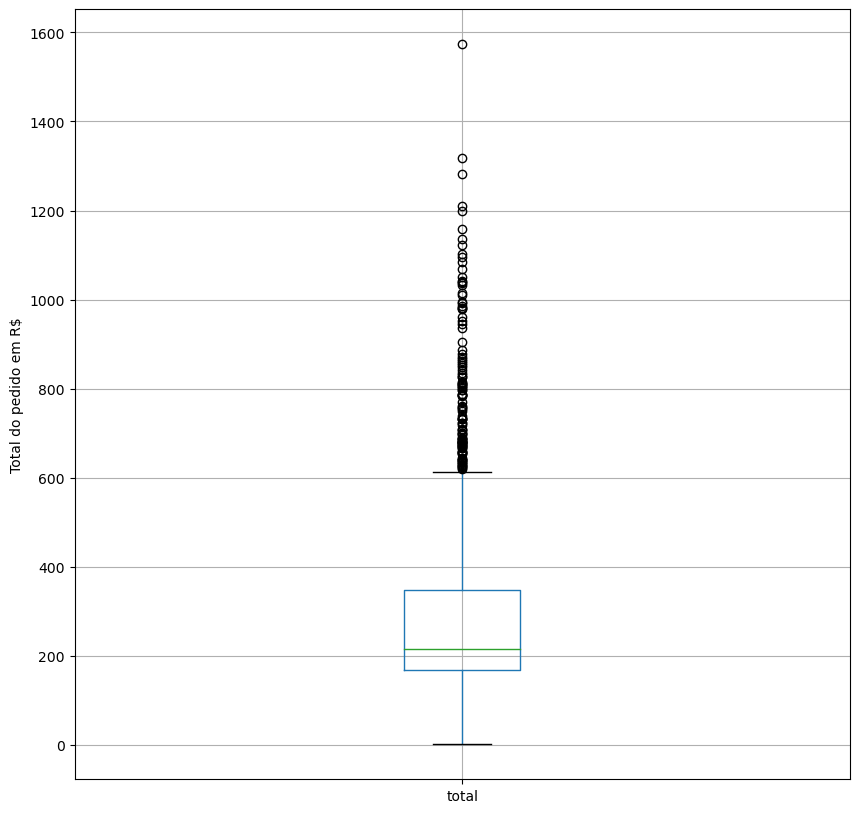

In [18]:
boxplot = df_orders.boxplot(figsize=(10,10), column=['total'])
boxplot.set_ylabel('Total do pedido em R$')

In [19]:
## Evolução dos Pedidos
# Entendendo o aumento na quantidade de vendas ao passar dos anos. 

In [20]:
df_orders['createdAt'] = pd.to_datetime(df_orders['createdAt'])
df_orders['updatedAt'] = pd.to_datetime(df_orders['updatedAt'])
df_orders['createdAt Timezone'] = pd.to_datetime(df_orders['createdAt Timezone'])


In [21]:
df_orders.index = df_orders["createdAt"]

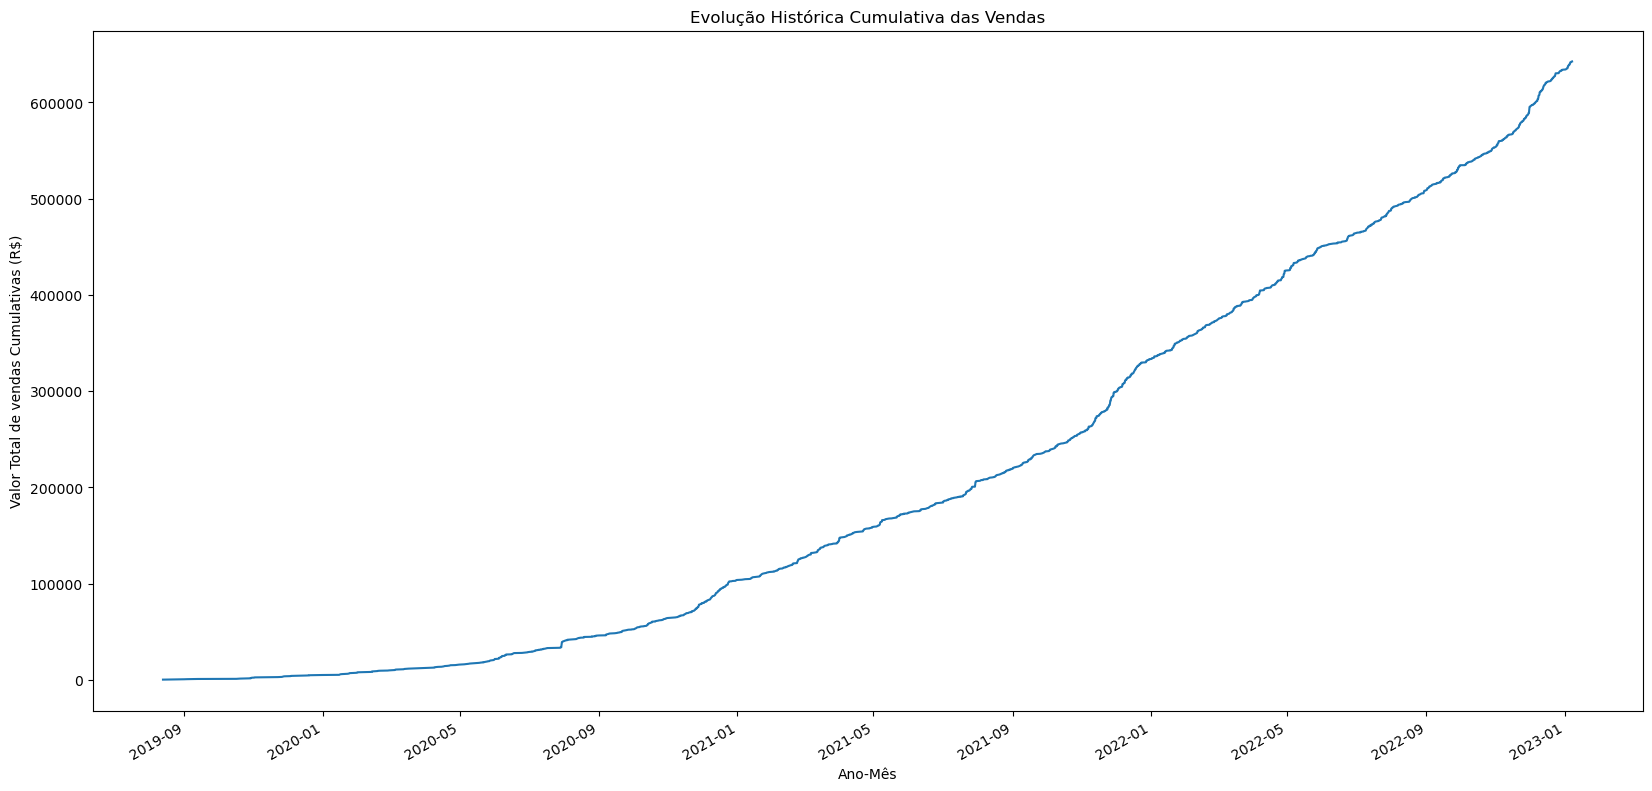

In [22]:
plt.figure(figsize=(20,10))
df_orders["total"].sort_index().cumsum().plot()

plt.title("Evolução Histórica Cumulativa das Vendas")
plt.ylabel('Valor Total de vendas Cumulativas (R$)')
plt.xlabel('Ano-Mês')
plt.show()

In [23]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2295 entries, 2020-10-07 20:37:13.589000 to 2023-01-07 13:59:33.974000
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   _id                        2295 non-null   object        
 1   shippingStatus             2295 non-null   object        
 2   subtotal                   2295 non-null   float64       
 3   total                      2295 non-null   float64       
 4   products                   2295 non-null   object        
 5   shippingTotal              2295 non-null   int64         
 6   user                       2295 non-null   object        
 7   gatewayStatus              2295 non-null   object        
 8   createdAt                  2295 non-null   datetime64[ns]
 9   updatedAt                  2295 non-null   datetime64[ns]
 10  shippingInfo.state         2295 non-null   object        
 11  shippingInfo.city  

In [24]:
# Formatar as datas para ficar mais facil a vizualição das vendas ao longo do tempo por cada mês
df_orders["Month/Year"] = df_orders["createdAt Timezone"].dt.strftime("%Y/%m")

In [25]:
## Gráfico sobre as vendas ao longo do tempo por cada mês
## Empresa cresceu aceleradamente durante a pandemia e manteve o crescimento no periodo pós pandêmico (embora que em taxas mais lentas).
# mas eh bom levar em consideração que esse tipo de comportamente eh comum em empresas novas, crescimento inicial rapido e crescimento mais lento posteriormente.

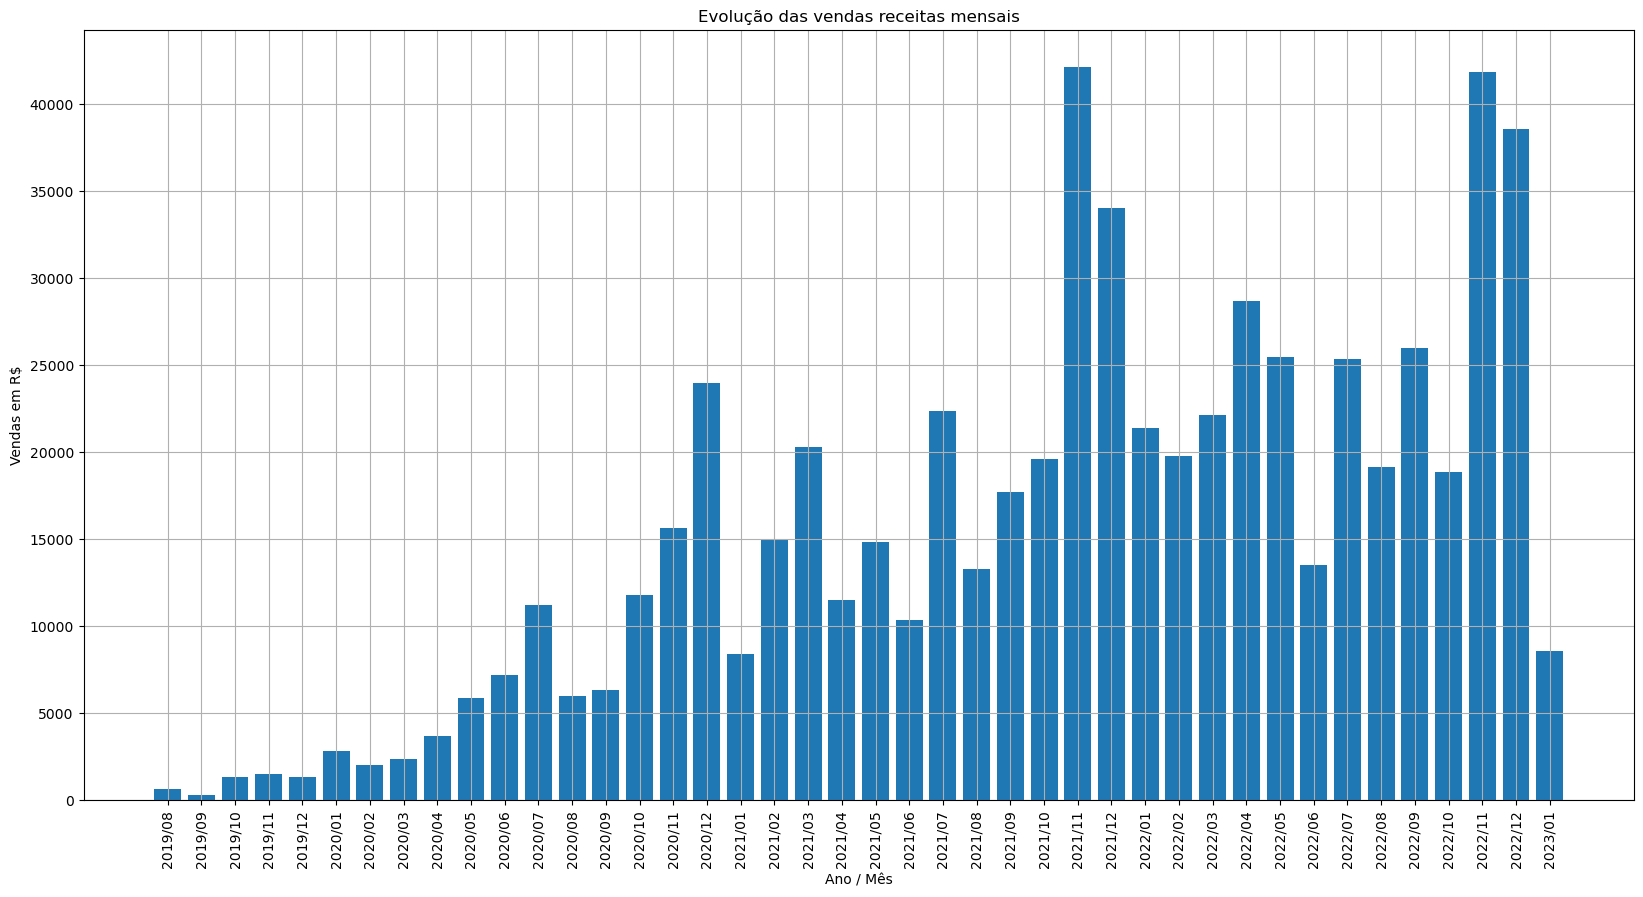

In [26]:
mont_year_count = df_orders.groupby("Month/Year").sum()
# months = range(1,13)
# hour_count = ordersFrame.groupby("Sale Hour").count()
# hour_count = ordersFrame.groupby("Sale Hour").sum()

# Generate data for plots 
# cities = df["City"].unique()
hours = [hour for hour, df1 in df_orders.groupby("Month/Year")]

# months2 = df["Month"].unique()
plt.figure(figsize=(20,10))
plt.bar(hours, mont_year_count["total"])
plt.xticks(hours, rotation="vertical")
plt.ylabel('Vendas em R$')
plt.xlabel('Ano / Mês')
plt.title('Evolução das vendas receitas mensais')
plt.grid()
plt.show()

In [27]:
# Horários com maior concentração de vendas.
# Podemos concluir que os horários com mais vendas são nos finais de turnos de trabalho - entre às 11-12h e 17-18h. É importante que a empresa pense em ações de impacto/comunicação com os seu clientes nesses horários 

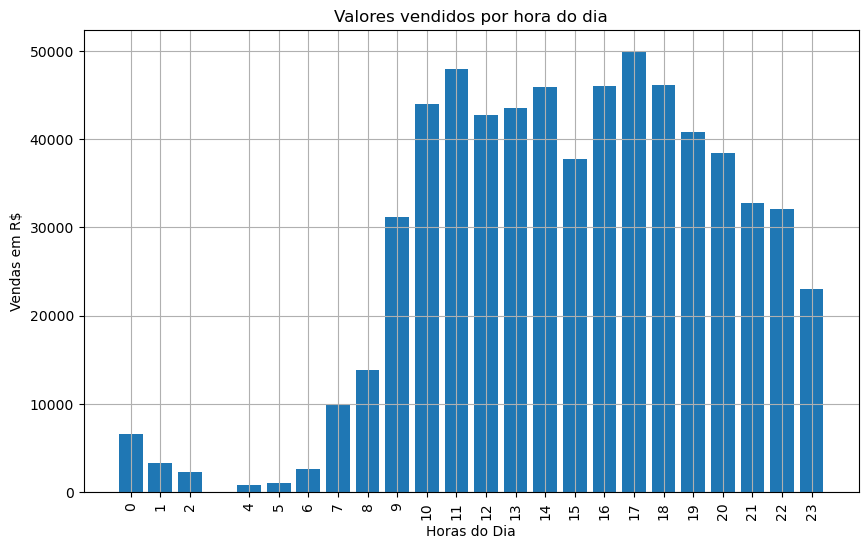

In [28]:
hour_count = df_orders.groupby("Sale Hour").sum()
# months = range(1,13)
# hour_count = ordersFrame.groupby("Sale Hour").count()
# hour_count = ordersFrame.groupby("Sale Hour").sum()

# Generate data for plots 
# cities = df["City"].unique()
hours = [hour for hour, df1 in df_orders.groupby("Sale Hour")]

# months2 = df["Month"].unique()
plt.figure(figsize=(10,6))
plt.bar(hours, hour_count["total"])
plt.xticks(hours, rotation="vertical")
plt.ylabel('Vendas em R$')
plt.xlabel('Horas do Dia')
plt.title('Valores vendidos por hora do dia')
plt.grid()
plt.show()

In [29]:
# Dias da semana com a maior concentração de vendas 
## Quarta e Quinta sao os dias com melhores vendas. Pensar em acoes nesse periodo

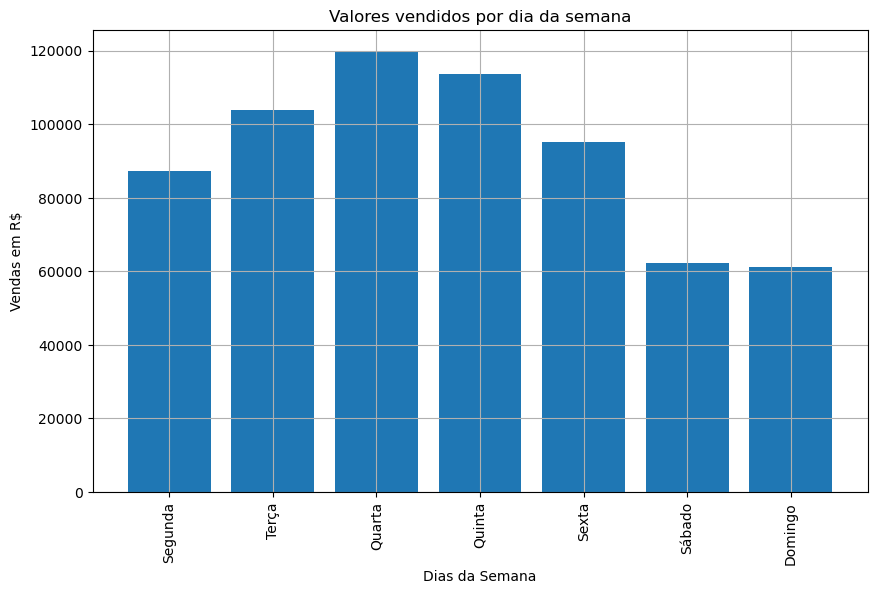

In [30]:
day_count = df_orders.groupby("weekday").sum()
day_count = day_count.reindex(index = ['Segunda', "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"])
# day_count
days = day_count.index
# days = [weekday for weekday, df1 in ordersFrame.groupby("weekday")]


# months2 = df["Month"].unique()
plt.figure(figsize=(10,6))
plt.bar(days, day_count["total"])
plt.xticks(days, rotation="vertical")
plt.ylabel('Vendas em R$')
plt.xlabel('Dias da Semana')
plt.title('Valores vendidos por dia da semana')
plt.grid()
plt.show()

In [31]:
# Concentração de vendas pelos dias do mês
# Tinha a expectativa de achar grande concentracao de vendas no inicio do mes por causa do tipo de produto nao necessariamente essencial. Mas nao parece ter um padrao significativo para chegar numa conclusao.

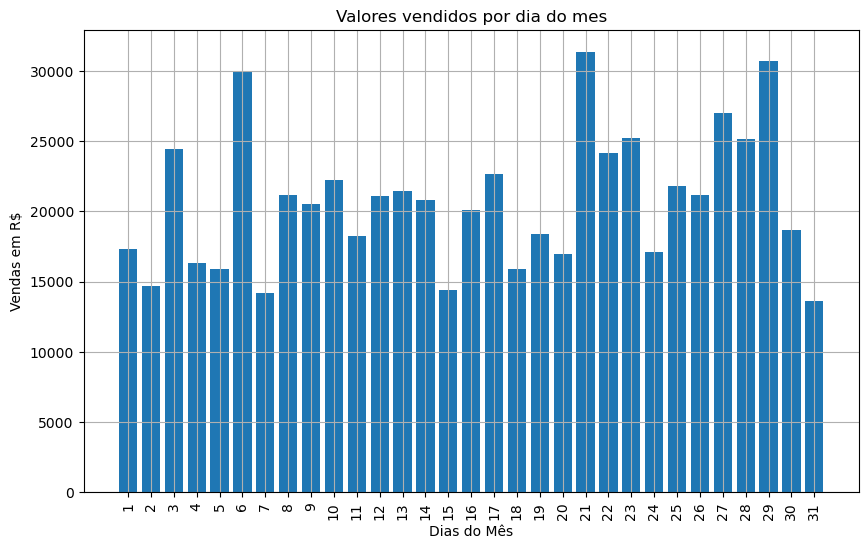

In [32]:
day_month_count = df_orders.groupby("day_month").sum()
days_month = [weekday for weekday, df1 in df_orders.groupby("day_month")]

# months2 = df["Month"].unique()
plt.figure(figsize=(10,6))
plt.bar(days_month, day_month_count["total"])
plt.xticks(days_month, rotation="vertical")
plt.ylabel('Vendas em R$')
plt.xlabel('Dias do Mês')
plt.title('Valores vendidos por dia do mes')
plt.grid()
plt.show()

In [33]:
# Análise exploratória df_products 
## Algumas colunas foram retiradas por terem informações que não seriam relevantes para a presente análise
## Objetivo de ter um maior entendimento sobre a segunda planilha disponibilizada

In [34]:
df_products = pd.read_csv('csv/anonymous_products.csv')

In [35]:
df_products.shape

(3510, 18)

In [36]:
df_products = df_products.drop(columns=['quantity'])

In [37]:
df_products = df_products.drop(columns=['Unnamed: 0'])

In [38]:
df_products = df_products.drop(columns=['selectedVariation.tecidos.tecidosImages'])

In [39]:
df_products = df_products.drop(columns=['selectedVariation.stockTecidos'])

In [40]:
df_products = df_products.drop(columns=['associatedProduct'])

In [41]:
df_products = df_products.drop(columns=['selectedVariation.images'])

In [42]:
df_products.tail()

,slug,_id,name,price,sellerId,selectedVariation.color.name,selectedVariation.color.hex,selectedVariation._id,selectedVariation.size,selectedVariation.tecidos._id,selectedVariation.tecidos.name,createdAt
3505,vestido-macaquinho-viscose,61a60ee569e2ca001866dccd,Vestido Macaquinho Viscose,23700,5caf95599eebb200176e2999,Coral,#FFBD9D,63b58740be233400160fff43,GG,62fa751f70cb9e0016f9dc05,Viscose Coral,2023-01-06 17:40:52.597000+00:00
3506,calca-comphy-linho,5e1f0f00d0ae4900176fb3d4,Calça Comphy Linho,19800,5caf95599eebb200176e2999,Natural,#DCD2BE,62190f3cfd596100184158a3,PP,5fc7ab23588c8d00175e065a,Linho Natural,2023-01-07 01:16:48.321000+00:00
3507,macacao-meka,6197ec077f95950018234fd1,Macacão Meka,31900,5caf95599eebb200176e2999,Preto,#000000,619d1421dffc3a0018a7d84c,PP,5fca3d2de8b93400179d1c95,Linho Preto,2023-01-07 01:16:48.321000+00:00
3508,macacao-chiara-em-linho,614c6565b7ba7700185f4bab,Macacão Chiara em Linho,25800,5caf95599eebb200176e2999,Branco,#E8E8E8,618d87572a50430018e2bd4e,PP,5fc7abfc588c8d00175e065b,Linho Branco,2023-01-07 01:16:48.321000+00:00
3509,macacao-lua,633b29e59b08d3001605b1c7,Macacão Lua,19800,5caf95599eebb200176e2999,Estampa folhagem barrado,#538247,633b29e59b08d3001605b1c8,P,6303a7b8991e430016a8d872,Viscose Estampa Folhagem Barrado,2023-01-07 13:59:33.974000+00:00


In [43]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   slug                            3510 non-null   object
 1   _id                             3510 non-null   object
 2   name                            3510 non-null   object
 3   price                           3510 non-null   int64 
 4   sellerId                        3505 non-null   object
 5   selectedVariation.color.name    3510 non-null   object
 6   selectedVariation.color.hex     3510 non-null   object
 7   selectedVariation._id           3510 non-null   object
 8   selectedVariation.size          3510 non-null   object
 9   selectedVariation.tecidos._id   1503 non-null   object
 10  selectedVariation.tecidos.name  1439 non-null   object
 11  createdAt                       3510 non-null   object
dtypes: int64(1), object(11)
memory usage: 329.2+ KB


In [44]:
df_products['selectedVariation.color.name'] = df_products['selectedVariation.color.name'].str.lower()

In [45]:
# Gráfico das Cores dos produtos mais vendidos 
# O gráfico mostra as cores dos produtos com mais de 40 vendas. Foi decidido o valor 40 por conta do demonstrativo do gráfico - com menor quantidade de vendas, mais cores aparecem no gráfico, o que acaba dificultando a analise
# Preto se mostra como a cor mais importante para as vendas.

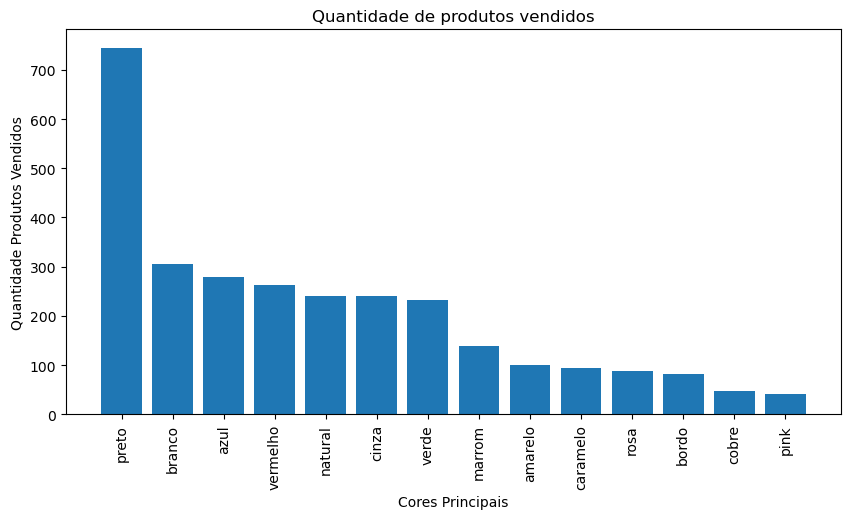

In [46]:
color_values_sold = df_products['selectedVariation.color.name'].value_counts()
color_values_sold = color_values_sold.where(color_values_sold > 40
                                           ).dropna()
color_values_sold = color_values_sold.convert_dtypes()
color_values_sold

color_sold = color_values_sold.keys()

plt.figure(figsize=(10,5))
plt.bar(color_sold, color_values_sold)
plt.xticks(color_sold, rotation="vertical")
plt.ylabel('Quantidade Produtos Vendidos')
plt.xlabel('Cores Principais')
plt.title('Quantidade de produtos vendidos')
plt.show()

In [47]:
# SEGUNDA ENTREGA
# 2. CORRELAÇÃO DOS DADOS
## Correlação baixa entre as variáveis.
# Horário de venda e a temperatura demontraram ter correlação negativa com o total vendido. 
## Temperatura e horário são difíceis de encontrar uma correlação direta

In [48]:
df_orders.corr(method='pearson')

,subtotal,total,shippingTotal,coupon.discount,weather.main.temp,Sale Hour,weekday-number,day_month
subtotal,1.000000,0.952610,0.000625,0.500451,-0.056422,0.041953,0.038890,-0.015652
total,0.952610,1.000000,0.007209,0.254689,-0.062521,0.040321,0.037251,-0.035377
shippingTotal,0.000625,0.007209,1.000000,-0.010280,0.088705,0.016006,0.008732,0.020275
coupon.discount,0.500451,0.254689,-0.010280,1.000000,-0.076587,0.057239,0.012110,-0.028010
weather.main.temp,-0.056422,-0.062521,0.088705,-0.076587,1.000000,-0.071236,-0.026050,0.049646
Sale Hour,0.041953,0.040321,0.016006,0.057239,-0.071236,1.000000,0.004898,0.043855
weekday-number,0.038890,0.037251,0.008732,0.012110,-0.026050,0.004898,1.000000,-0.004262
day_month,-0.015652,-0.035377,0.020275,-0.028010,0.049646,0.043855,-0.004262,1.000000


<AxesSubplot:>

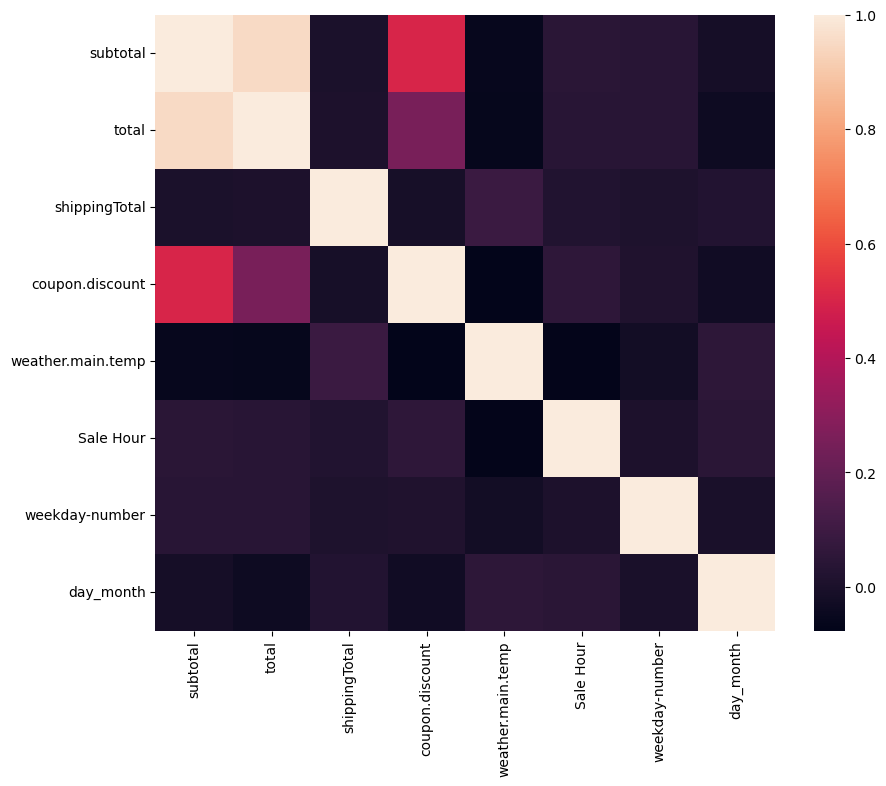

In [49]:
import seaborn as sns
plt.subplots(figsize=(10,8))
sns.heatmap(df_orders.corr())

In [50]:
## Puxei a tail do DataFrame para entender o motivo de terem sido identificados uma quantidade tão baixa de variáveis correlacionadas. 
## Uma grande parcela são informações nominais. Temperatura e horário de venda não tem correlação direta. 
df_orders.tail()

,_id,shippingStatus,subtotal,total,products,shippingTotal,user,gatewayStatus,createdAt,updatedAt,...,coupon.seller,coupon.discount,coupon.couponType,weather.main.temp,createdAt Timezone,Sale Hour,weekday-number,weekday,day_month,Month/Year
createdAt,,,,,,,,,,,,,,,,,,,,,
2023-01-05 22:09:26.532,63b74a96c362a600169d212f,not sent,557.0,557.0,[{'selectedVariation': {'color': {'name': 'Azu...,0,63b746a9c362a600169d1cd1,paid,2023-01-05 22:09:26.532,2023-01-05 22:10:55.800,...,NaN,NaN,NaN,26.92,2023-01-05 19:09:26.532,19,3,Quinta,5,2023/01
2023-01-05 23:22:55.123,63b75bcfc362a600169d286b,not sent,347.0,173.5,[{'selectedVariation': {'color': {'name': 'Ver...,0,63b23337e8cbeb0016c42651,paid,2023-01-05 23:22:55.123,2023-01-05 23:24:10.588,...,5caf95599eebb200176e2999,17350.0,percentage,24.18,2023-01-05 20:22:55.123,20,3,Quinta,5,2023/01
2023-01-06 17:40:52.597,63b85d24852bc500162c405b,not sent,237.0,237.0,[{'selectedVariation': {'color': {'hex': '#FFB...,0,62e1d87e6117dd0016b0b7ed,paid,2023-01-06 17:40:52.597,2023-01-06 17:40:52.597,...,NaN,NaN,NaN,28.73,2023-01-06 14:40:52.597,14,4,Sexta,6,2023/01
2023-01-07 01:16:48.321,63b8c800852bc500162c5b70,not sent,775.0,575.0,[{'selectedVariation': {'color': {'name': 'Nat...,0,5e921bb39f8d5a0017157c0b,paid,2023-01-07 01:16:48.321,2023-01-07 01:16:48.321,...,5caf95599eebb200176e2999,20000.0,fixValue,21.58,2023-01-06 22:16:48.321,22,4,Sexta,6,2023/01
2023-01-07 13:59:33.974,63b97ac54368f5001654120b,not sent,198.0,168.0,[{'selectedVariation': {'color': {'name': 'Est...,0,63b979d84368f5001654112b,paid,2023-01-07 13:59:33.974,2023-01-07 14:00:27.089,...,5caf95599eebb200176e2999,3000.0,fixValue,17.78,2023-01-07 10:59:33.974,10,5,Sábado,7,2023/01


In [51]:
## Construi outro df_orders para não correr risco de ter uma alteração no original. 
## Muitas colunas não possuiam informação sobre a temperatura, vindo a serem apagadas para termos uma melhor visualização das informações

In [52]:
df_ordersTemp = df_orders

In [53]:
df_ordersTemp["intTemperatura"] = df_ordersTemp["weather.main.temp"].fillna(0).astype(int)

In [54]:
df_ordersTemp = df_ordersTemp.drop(df_ordersTemp[df_ordersTemp['intTemperatura'] == 0].index)


In [55]:
# Temperatura média de vendas eh 22.27 Celsius e Porto Alegre tem uma temperatura média de 19.7 °C (climate-data.org). Dias mais quentes tendem a vender mais.

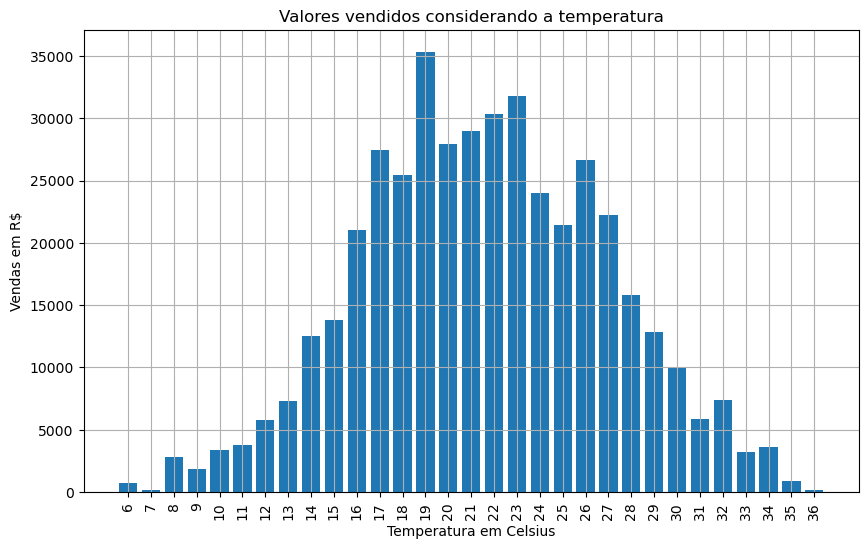

In [56]:
## Vendas X Temperatura 
temperatureCount = df_ordersTemp.groupby("intTemperatura").sum()
temp_sale = [temp for temp, df1 in df_ordersTemp.groupby("intTemperatura")]

# months2 = df["Month"].unique()
plt.figure(figsize=(10,6))
plt.bar(temp_sale, temperatureCount["total"])
plt.xticks(temp_sale, rotation="vertical")
plt.ylabel('Vendas em R$')
plt.xlabel('Temperatura em Celsius')
plt.title('Valores vendidos considerando a temperatura')
plt.grid()
plt.show()

In [57]:
# 3. REGRESSÃO LINEAR  

In [58]:
## Delimitação das variáveis que serão trabalhadas

In [59]:
df_orders = df_orders[['createdAt', 'total']]

In [60]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2295 entries, 2020-10-07 20:37:13.589000 to 2023-01-07 13:59:33.974000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   createdAt  2295 non-null   datetime64[ns]
 1   total      2295 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.3 KB


In [61]:
## Converter as informações de tempo para ano/meses/dia
df_orders = df_orders.drop('createdAt', axis=1).reset_index()
df_orders['createdAt'] = df_orders['createdAt'].dt.to_period("M")
monthly_sales = df_orders.groupby('createdAt').sum().reset_index()

In [62]:
monthly_sales['createdAt'] = monthly_sales['createdAt'].dt.to_timestamp()

In [63]:
monthly_sales.head()

,createdAt,total
0,2019-08-01,607.0
1,2019-09-01,298.0
2,2019-10-01,1315.7
3,2019-11-01,1476.0
4,2019-12-01,1338.8


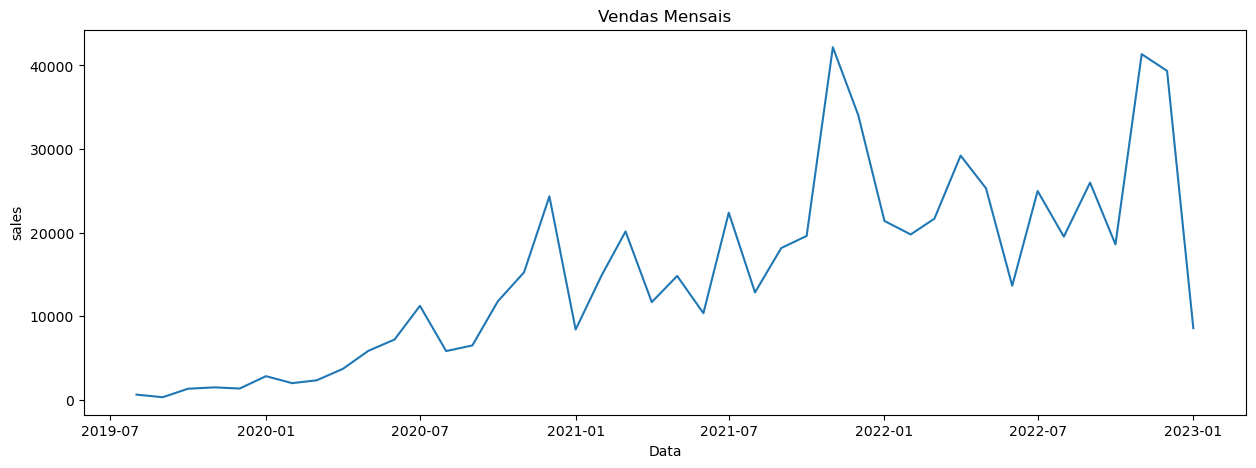

In [64]:
## Visualização das vendas no decorrer do tempo
## Refiz o gráfico novamente para ser mais fácil a análise dentro dessa nova etapa do trabalho
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['createdAt'], monthly_sales['total'])
plt.xlabel('Data')
plt.ylabel('sales')
plt.title('Vendas Mensais')
plt.show()

In [65]:
## Encontrar a diferença entre o que foi vendido entre um mês e o outro
monthly_sales['sales_diff'] = monthly_sales['total'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.head(10)

,createdAt,total,sales_diff
1,2019-09-01,298.00,-309.00
2,2019-10-01,1315.70,1017.70
3,2019-11-01,1476.00,160.30
4,2019-12-01,1338.80,-137.20
5,2020-01-01,2817.40,1478.60
6,2020-02-01,1981.60,-835.80
7,2020-03-01,2322.00,340.40
8,2020-04-01,3697.80,1375.80
9,2020-05-01,5848.75,2150.95
10,2020-06-01,7203.80,1355.05


In [66]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 1 to 41
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   createdAt   41 non-null     datetime64[ns]
 1   total       41 non-null     float64       
 2   sales_diff  41 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.3 KB


In [67]:
## Dados Supervisionados - utilização de Machine Learning 

In [68]:
supervised_data = monthly_sales.drop(['createdAt','total'], axis=1)

In [69]:
for i in range(1,13):
    col_name='month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,679.30,-5412.9,4028.8,1355.05,2150.95,1375.80,340.40,-835.80,1478.60,-137.20,160.30,1017.70,-309.00
1,5271.60,679.3,-5412.9,4028.80,1355.05,2150.95,1375.80,340.40,-835.80,1478.60,-137.20,160.30,1017.70
2,3472.10,5271.6,679.3,-5412.90,4028.80,1355.05,2150.95,1375.80,340.40,-835.80,1478.60,-137.20,160.30
3,9091.80,3472.1,5271.6,679.30,-5412.90,4028.80,1355.05,2150.95,1375.80,340.40,-835.80,1478.60,-137.20
4,-15933.80,9091.8,3472.1,5271.60,679.30,-5412.90,4028.80,1355.05,2150.95,1375.80,340.40,-835.80,1478.60
5,6534.00,-15933.8,9091.8,3472.10,5271.60,679.30,-5412.90,4028.80,1355.05,2150.95,1375.80,340.40,-835.80
6,5198.90,6534.0,-15933.8,9091.80,3472.10,5271.60,679.30,-5412.90,4028.80,1355.05,2150.95,1375.80,340.40
7,-8454.30,5198.9,6534.0,-15933.80,9091.80,3472.10,5271.60,679.30,-5412.90,4028.80,1355.05,2150.95,1375.80
8,3131.60,-8454.3,5198.9,6534.00,-15933.80,9091.80,3472.10,5271.60,679.30,-5412.90,4028.80,1355.05,2150.95
9,-4455.95,3131.6,-8454.3,5198.90,6534.00,-15933.80,9091.80,3472.10,5271.60,679.30,-5412.90,4028.80,1355.05


In [70]:
#Divisão dos dados em treinamento e teste

In [71]:
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]
print('Train Data Shape: ', train_data.shape)
print('Test Data Shape: ', test_data.shape)

Train Data Shape:  (17, 13)
Test Data Shape:  (12, 13)


In [72]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [73]:
x_train, y_train = train_data[:,1:], train_data[:,0:1]
x_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print('X_train Shape: ', x_train.shape) 
print('y_train Shape: ', y_train.shape) 
print('x_test Shape: ', x_test.shape)
print('y_test Shape: ', y_test.shape)

X_train Shape:  (17, 12)
y_train Shape:  (17,)
x_test Shape:  (12, 12)
y_test Shape:  (12,)


In [74]:
##Fazer predição por meio dos dados

In [75]:
sales_dates = monthly_sales['createdAt'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [76]:
act_sales = monthly_sales['total'][-13:].to_list()
print(act_sales)

[21389.5, 19779.05, 21665.8, 29214.4, 25298.920000000002, 13640.16, 24977.1, 19517.65, 25981.5, 18583.6, 41354.96, 39353.22, 8559.0]


In [77]:
#construção do modelo de regressão linear 

In [78]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pre = lr_model.predict(x_test)

In [79]:
lr_pre = lr_pre.reshape(-1,1)
#MATRIX 
lr_pre_test_set = np.concatenate([lr_pre, x_test], axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)

In [80]:
result_list =[]
for index in range(0, len(lr_pre_test_set)):
    result_list.append(lr_pre_test_set[index][0] + act_sales[index])
lr_pre_series = pd.Series(result_list, name= "Linear Prediction")
predict_df = predict_df.merge(lr_pre_series, left_index= True, right_index = True)

In [81]:
##Verificar se o que foi desenvolvido está correto 
print(predict_df)

    createdAt  Linear Prediction
0  2022-02-01       66135.078162
1  2022-03-01      -26028.218241
2  2022-04-01       79710.511133
3  2022-05-01      -36766.126485
4  2022-06-01       73670.482481
5  2022-07-01      -30792.622545
6  2022-08-01       60987.343507
7  2022-09-01      -11407.629152
8  2022-10-01       77046.305109
9  2022-11-01        6806.586483
10 2022-12-01       79872.581522
11 2023-01-01       30381.213892


In [82]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_sales['total'][-12:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'], monthly_sales['total'][-12:])
lr_r2 = r2_score(predict_df['Linear Prediction'], monthly_sales['total'][-12:])


print('Linear Regression MSE', lr_mse )
print('Linear Regression MAE', lr_mae )
print('Linear Regression R2', lr_r2 )

Linear Regression MSE 47772.56680052377
Linear Regression MAE 46385.22714550956
Linear Regression R2 -0.10064119740475563


In [83]:
## Visualização da previsão de vendas 

<function matplotlib.pyplot.show(close=None, block=None)>

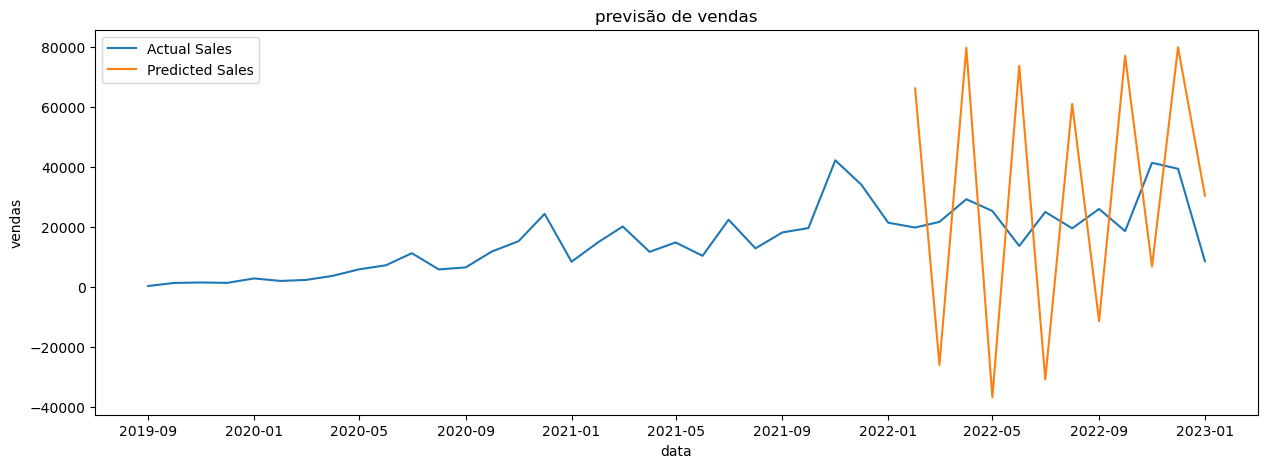

In [84]:
plt.figure(figsize=(15,5))
#Actual sales 
plt.plot(monthly_sales['createdAt'], monthly_sales['total'])
#Predicted sales 

plt.plot(predict_df['createdAt'], predict_df['Linear Prediction'])
plt.title('previsão de vendas')
plt.xlabel('data')
plt.ylabel('vendas')
plt.legend(['Actual Sales', 'Predicted Sales'])
plt.show

In [85]:
## A previsão foi extremante errada. O modelo adotado pode ter prejudicado? A quantidade de dados não é suficiente para a utilização desse modelo?